In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
data = pd.read_csv("C:\\Users\\Chand\\Downloads\\A5\\NSSO68.csv", low_memory=False)

In [3]:
display(data)

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.180000
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.950000
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.840000
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.300000
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101657,101658,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,0.000000,544.013667,28.441750,J$K,2,0.000000,25.833333
101658,101659,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,8.000000,417.616600,25.490282,J$K,2,0.000000,49.000000
101659,101660,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,7.142857,378.300429,25.800107,J$K,2,0.000000,32.285714
101660,101661,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,14.000000,510.023600,30.220170,J$K,2,0.000000,39.200000


In [4]:
Mizoram_data = data[data['state_1'] == 'MIZ']

In [6]:
missing_values = Mizoram_data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [9]:
MIZ = Mizoram_data[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

In [10]:
def impute_with_mean(column):
    if column.hasnans:
        column.fillna(column.mean(), inplace=True)
    return column

In [11]:
MIZ['Meals_At_Home'] = impute_with_mean(MIZ['Meals_At_Home'])

C:\Users\Chand\AppData\Local\Temp\ipykernel_20888\3434046346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIZ['Meals_At_Home'] = impute_with_mean(MIZ['Meals_At_Home'])


In [12]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    MIZ = remove_outliers(MIZ, col)

In [13]:
MIZ['total_consumption'] = MIZ[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

In [16]:
def summarize_consumption(group_col):
    summary = MIZ.groupby(group_col)['total_consumption'].sum().reset_index()
    summary.sort_values(by='total_consumption', ascending=False, inplace=True)
    return summary

In [20]:
district_summary = summarize_consumption('District')
region_summary = summarize_consumption('Region')

In [18]:
print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

Top Consuming Districts:
   District  total_consumption
2         3       23071.710148
5         6       14292.095238
3         4        7531.556744
7         8        5964.139484
Region Consumption Summary:
   Region  total_consumption
0       1       68630.878635


In [21]:
district = {'1': 'Mamit',
    '2': 'Kolasib',
    '3': 'Aizawl ',
    '4': 'Champhai',
    '5': 'Serchhip',
    '6': 'Lunglei',
    '7': 'Lawngtlai',
    '8': 'Saiha',
}

sector = {
    '2': 'URBAN',
    '1': 'RURAL'
}

In [24]:
MIZ['District'] = MIZ['District'].astype(str)
MIZ['Sector'] = MIZ['Sector'].astype(str)

MIZ['District'] = MIZ['District'].map(district).fillna(MIZ['District'])
MIZ['Sector'] = MIZ['Sector'].map(sector).fillna(MIZ['Sector'])

In [25]:
print(MIZ.head())

      state_1  District  Region Sector  State_Region  Meals_At_Home  \
14581     MIZ  Serchhip       1  URBAN           151           60.0   
14582     MIZ  Serchhip       1  URBAN           151           60.0   
14583     MIZ  Serchhip       1  URBAN           151           60.0   
14584     MIZ  Serchhip       1  URBAN           151           60.0   
14585     MIZ  Serchhip       1  URBAN           151           60.0   

       ricepds_v  Wheatpds_q  chicken_q  pulsep_q  wheatos_q  \
14581       38.0         0.0        0.0       0.0        0.0   
14582       38.0         0.0        0.0       0.0        0.0   
14583       38.0         0.0        0.0       0.0        0.0   
14584        0.0         0.0        0.0       0.0        0.0   
14585       38.0         0.0        0.0       0.0        0.0   

       No_of_Meals_per_day  total_consumption  
14581                  NaN               38.0  
14582                  2.0               38.0  
14583                  2.0               38.

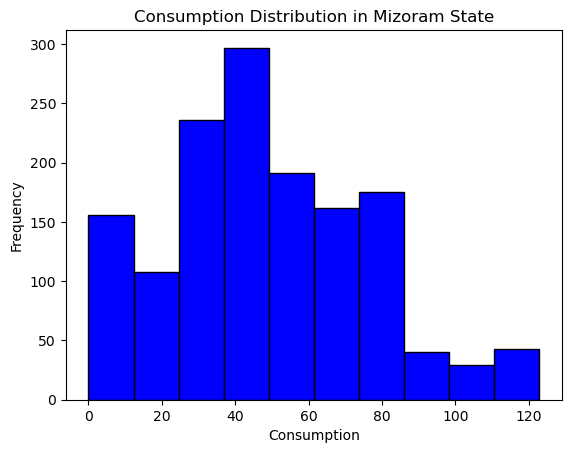

In [39]:
plt.hist(MIZ['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Consumption Distribution in Mizoram State")
plt.show()

In [29]:
MIZ_consumption = MIZ.groupby('District')['total_consumption'].sum().reset_index()

In [30]:
print(MIZ_consumption.head())

    District  total_consumption
0    Aizawl        23071.710148
1   Champhai        7531.556744
2    Kolasib        4149.339286
3  Lawngtlai        5008.772619
4    Lunglei       14292.095238


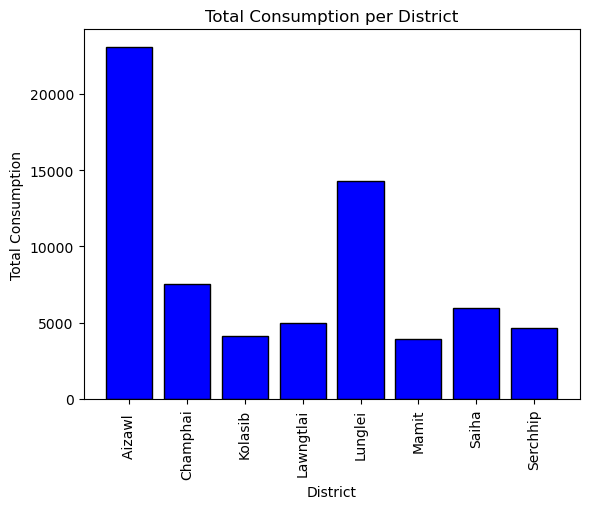

In [31]:
plt.bar(MIZ_consumption['District'], MIZ_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption per District")
plt.xticks(rotation=90)  # Rotate district names for better visibility
plt.show()

In [32]:
data_map = gpd.read_file("C:\\Users\\Chand\\Downloads\\MIZORAM_DISTRICTS.geojson")

In [34]:
print(data_map.columns)
print(MIZ_consumption.columns)

Index(['OBJECTID', 'dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat',
       'test', 'Dist_LGD', 'State_LGD', 'Shape_Leng', 'Shape.STArea()',
       'Shape.STLength()', 'geometry'],
      dtype='object')
Index(['District', 'total_consumption'], dtype='object')


In [35]:
data_map['District'] = MIZ_consumption['District']

In [36]:
data_map_data = data_map.merge(MIZ_consumption, left_on='dtname', right_on='District')

In [37]:
print(data_map.columns)

Index(['OBJECTID', 'dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat',
       'test', 'Dist_LGD', 'State_LGD', 'Shape_Leng', 'Shape.STArea()',
       'Shape.STLength()', 'geometry', 'District'],
      dtype='object')


In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data_map = gpd.read_file("C:\\Users\\Chand\\Downloads\\MIZORAM_DISTRICTS.geojson")

In [42]:
data_map = data_map.rename(columns={'dtname': 'District'})

In [43]:
display(data_map.rename)

<bound method DataFrame.rename of     OBJECTID   District   stname stcode11 dtcode11 year_stat  test  Dist_LGD  \
0        385    Kolasib  MIZORAM       15      282    2011_c     0       263   
1        390     Aizawl  MIZORAM       15      283    2011_c     0       261   
2        391      Mamit  MIZORAM       15      281    2011_c     1       266   
3        403   Champhai  MIZORAM       15      284    2011_c     0       262   
4        426   Serchhip  MIZORAM       15      285    2011_c     0       268   
5        431    Lunglei  MIZORAM       15      286    2011_c     0       265   
6        497      Saiha  MIZORAM       15      288    2011_c     0       267   
7        499  Lawngtlai  MIZORAM       15      287    2011_c     0       264   
8        734  Hnahthial  MIZORAM       15      793    201920     0       726   
9        735    Saitual  MIZORAM       15      794    201920     0       727   
10       736   Khawzawl  MIZORAM       15      795    201920     0       728   

    S

In [45]:
MIZ_consumption = pd.read_csv("C:\\Users\\Chand\\Downloads\\A5\\NSSO68.csv", low_memory=False)

In [46]:
MIZ_consumption = MIZ.groupby('District')['total_consumption'].sum().reset_index()

In [47]:
print(MIZ_consumption.head())

    District  total_consumption
0    Aizawl        23071.710148
1   Champhai        7531.556744
2    Kolasib        4149.339286
3  Lawngtlai        5008.772619
4    Lunglei       14292.095238


In [48]:
data_map = gpd.read_file("C:\\Users\\Chand\\Downloads\\MIZORAM_DISTRICTS.geojson")
data_map = data_map.rename(columns={'dtname': 'total_consumption'})

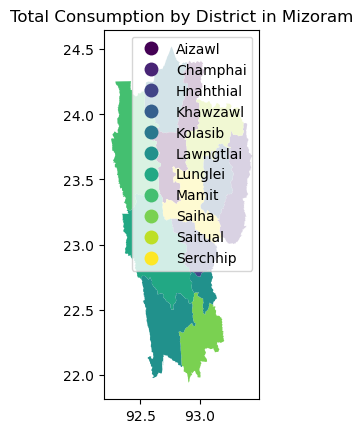

In [49]:
fig, ax = plt.subplots(1, 1)
data_map.plot(column='total_consumption', cmap='viridis', legend=True, ax=ax)
ax.set_title('Total Consumption by District in Mizoram')
plt.show()